In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In real scenes, we don't get access to the whole dataset. Here we apply analysis to subset of data(eg. top songs from some years)

find features that are highly correlated to the 3rd party ranking and display them.

In [226]:
df = pd.read_csv('songs_normalize.csv')

In [227]:
df.info() 
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)
print(len(df))
df = df.drop_duplicates()
print("Length after drop duplicates :")
print(len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [228]:
df.describe()

duration_ms         year   popularity  danceability       energy  \
count    1941.000000  1941.000000  1941.000000   1941.000000  1941.000000   
mean   228594.973725  2009.520350    59.633179      0.667814     0.721549   
std     39249.796103     5.875532    21.501053      0.140608     0.152872   
min    113000.000000  1998.000000     0.000000      0.129000     0.054900   
25%    203506.000000  2004.000000    56.000000      0.581000     0.624000   
50%    223186.000000  2010.000000    65.000000      0.676000     0.739000   
75%    247946.000000  2015.000000    73.000000      0.765000     0.840000   
max    484146.000000  2020.000000    89.000000      0.975000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  1941.000000  1941.000000  1941.000000  1941.000000   1941.000000   
mean      5.369397    -5.514082     0.553323     0.103783      0.128173   
std       3.615270     1.938950     0.497277     0.096148      0.172584   
min       0.000000   -20.514000     0.000000     0.023200      0.000019   
25%       2.000000    -6.490000     0.000000     0.039700      0.013500   
50%       6.000000    -5.285000     1.000000     0.061000      0.055800   
75%       8.000000    -4.168000     1.000000     0.129000      0.176000   
max      11.000000    -0.276000     1.000000     0.576000      0.976000   

       instrumentalness     liveness      valence        tempo  
count       1941.000000  1941.000000  1941.000000  1941.000000  
mean           0.015372     0.181726     0.552966   120.158442  
std            0.088371     0.140910     0.220845    26.990475  
min            0.000000     0.021500     0.038100    60.019000  
25%            0.000000     0.088400     0.390000    98.986000  
50%            0.000000     0.124000     0.560000   120.028000  
75%            0.000069     0.242000     0.731000   134.199000  
max            0.985000     0.853000     0.973000   210.851000

<AxesSubplot:xlabel='year', ylabel='count'>

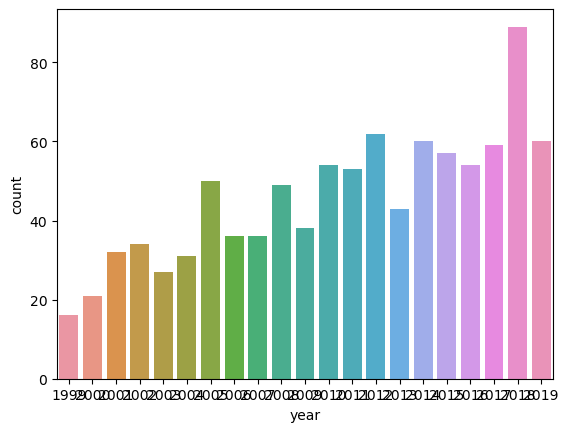

In [229]:
df_popular = df.loc[(df.popularity>65)]
sns.countplot(x='year', data=df_popular)


In [230]:
df_popular

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
5              Sisqo                              Thong Song       253733   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode  \
0        False  2000          77         0.751   0.834    1    -5.444     0   
1        False  1999          79         0.434   0.897    0    -4.918     1   
2        False  1999          66         0.529   0.496    7    -9.007     1   
3        False  2000          78         0.551   0.913    0    -4.063     0   
5         True  1999          69         0.706   0.888    2    -6.959     1   
...        ...   ...         ...           ...     ...  ...       ...   ...   
1995     False  2019          79         0.842   0.734    1    -5.065     0   
1996     False  2019          78         0.552   0.702    9    -5.707     1   
1997     False  2019          69         0.847   0.678    9    -8.635     1   
1998     False  2019          75         0.741   0.520    8    -7.513     1   
1999     False  2019          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.3000          0.000018    0.3550    0.894   95.053   
1          0.0488        0.0103          0.000000    0.6120    0.684  148.726   
2          0.0290        0.1730          0.000000    0.2510    0.278  136.859   
3          0.0466        0.0263          0.000013    0.3470    0.544  119.992   
5          0.0654        0.1190          0.000096    0.0700    0.714  121.549   
...           ...           ...               ...       ...      ...      ...   
1995       0.0588        0.0427          0.000000    0.1060    0.952  137.958   
1996       0.1570        0.1170          0.000021    0.1050    0.564  169.994   
1997       0.1090        0.0669          0.000000    0.2740    0.811   97.984   
1998       0.0656        0.4500          0.000002    0.2220    0.347  102.998   
1999       0.0395        0.1920          0.002440    0.0863    0.553  120.042   

                  genre  
0                   pop  
1             rock, pop  
2          pop, country  
3           rock, metal  
5     hip hop, pop, R&B  
...                 ...  
1995                pop  
1996                pop  
1997   hip hop, country  
1998                pop  
1999            hip hop  

[961 rows x 18 columns]

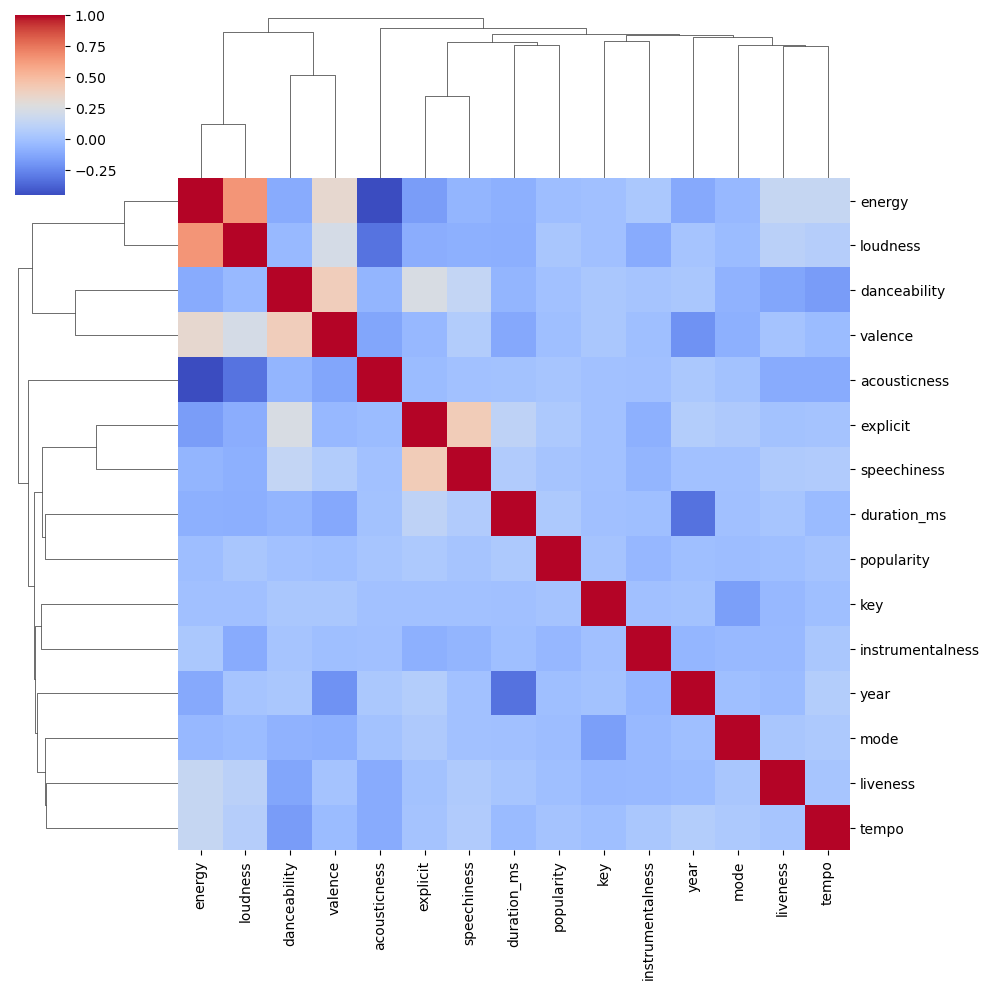

In [231]:
sns.clustermap(df.corr(),cmap='coolwarm')


In [232]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [233]:
df_num.columns

Index(['duration_ms', 'year', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

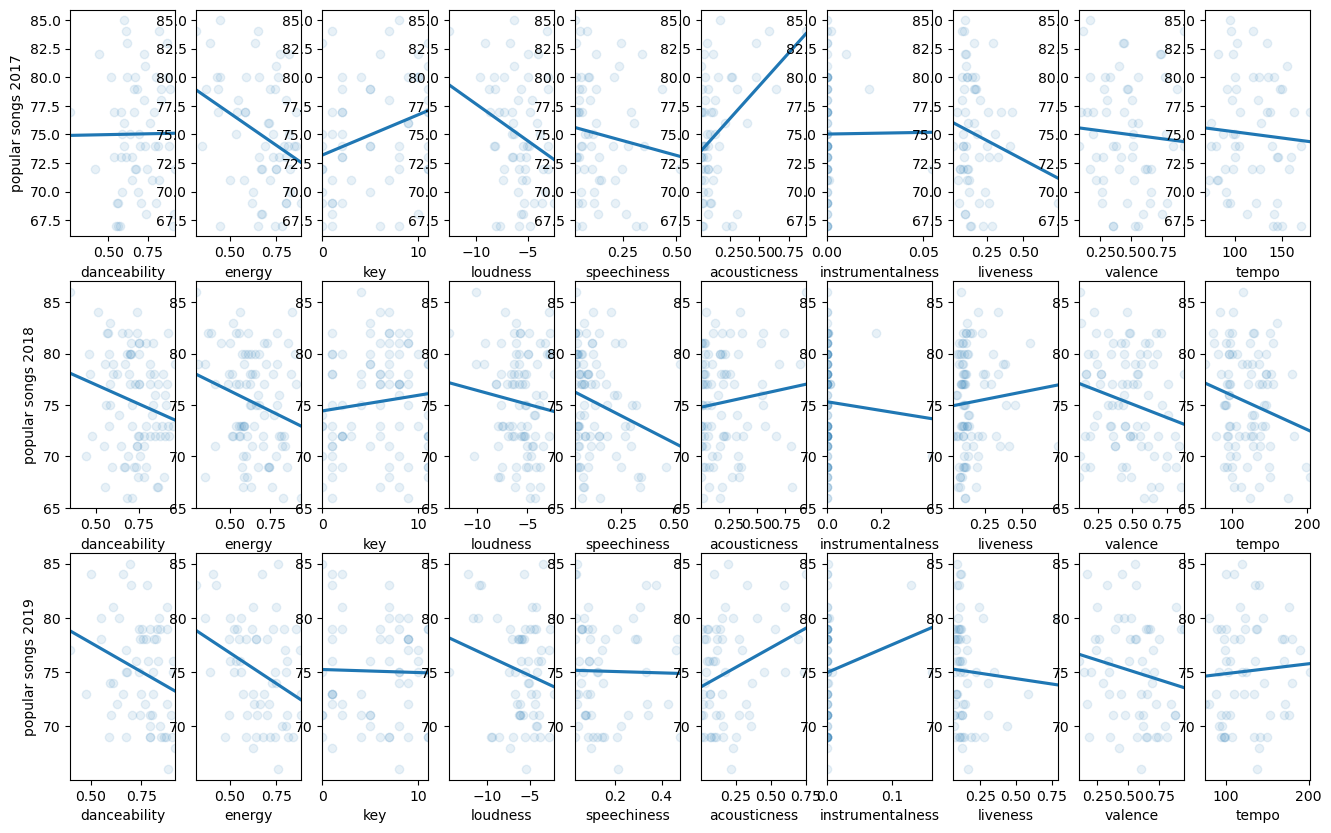

In [234]:
start = 2017
years = 3
cols = ['danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
features = len(cols)
df_popular_num = df_popular[cols]

fig, axes = plt.subplots(years, features,figsize=(16,10))

for i in range(years): #year
    
    
    for j in range(features):
        axes[i][j].set_xlabel(df_popular_num.columns[j])
        sns.regplot (x=df_popular_num.loc[(df_popular.year==start+i)].iloc[:,j],
                     y=df_popular.loc[(df_popular.year==start+i)].popularity, 
                     ax = axes[i][j],
                     ci=None,
                     scatter_kws={"alpha":0.1})
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'popular songs {start+i}')  


No handles with labels found to put in legend.


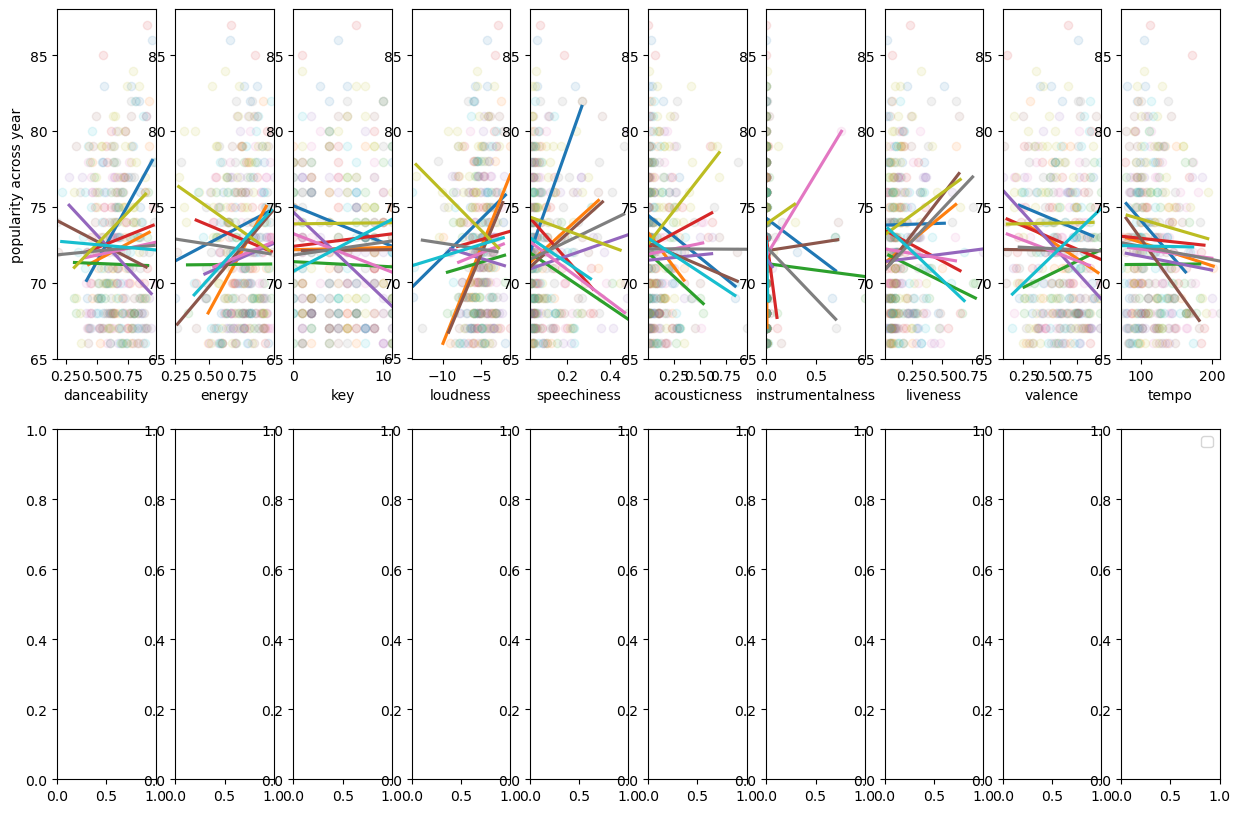

In [235]:


fig, axes = plt.subplots(2, features,figsize=(15,10))

for i in range(1): 
       
    for j in range(features):
        axes[i][j].set_xlabel(df_popular_num.columns[j])
        
        for k in range(10):
            sns.regplot (x=df_popular_num.loc[(df_popular.year==df_popular.year.unique()[k])].iloc[:,j],
                         y=df_popular.loc[(df_popular.year==df_popular.year.unique()[k])].popularity,
                         ax = axes[i][j],
                         ci=None,
                         label=df_popular.year.unique()[k],
                         scatter_kws={"alpha":0.1})
        axes[i][j].set_ylabel('')
    axes[i][0].set_ylabel(f'popularity across year')  
    
plt.legend(loc=0)


In [236]:
import io
import os
import sys
import json
import django

import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import plot
offline.init_notebook_mode(connected=True)

# BDIR = os.path.abspath(os.path.join(sys.argv[0], '../../../..'))

# # run this file in project floder
# sys.path.insert(0, '../../../xai/')

# # need this to run django models
# os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'xai_demo.settings')
# os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

# django.setup()


In [237]:
# from xai_backend.services import sample_ranking

# songs = sample_ranking().content

# df_songs = pd.DataFrame(json.loads(songs))


Instead get rankings from the backend, loads rankings from files

In [238]:
df_songs = pd.DataFrame(json.load(open('song1.json')))
# df_songs = pd.DataFrame(json.load(open('song2.json')))
# df_songs = pd.DataFrame(json.load(open('song3.json')))

In [239]:
cols = ['acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness',
       'loudness', 'popularity', 'rank',
       'speechiness', 'tempo', 'valence']

df_songs_num = df_songs[cols]

In [240]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(df_songs_num, diag='box', index='rank',colormap='Portland',
                                  colormap_type='cat',
                                  height=1600, width=1600)
fig.show()

In [241]:
import plotly.express as px


corr = df_songs_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.round(2).to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.RdBu,
                                  hoverinfo="none", #Shows hoverinfo for null values
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white',
)


In [242]:
most_corr = corr.reindex(corr['rank'].abs().sort_values()[::-1].index)

In [243]:
df_songs_num[most_corr.index[1]]

0    0.00727
1    0.01990
2    0.05940
3    0.06160
4    0.05840
5    0.02080
6    0.06420
7    0.22600
8    0.74000
9    0.69500
Name: acousticness, dtype: float64

In [244]:
df_songs

acousticness             artist  danceability  duration_ms  energy  \
0       0.00727    Destiny's Child         0.814     242013.0   0.899   
1       0.01990                D12         0.780     304506.0   0.634   
2       0.05940           Ludacris         0.555     270746.0   0.639   
3       0.06160              Nelly         0.850     291781.0   0.700   
4       0.05840  Justin Timberlake         0.967     242733.0   0.583   
5       0.02080           Flo Rida         0.747     224653.0   0.937   
6       0.06420            Cardi B         0.747     200889.0   0.570   
7       0.22600            Beyoncé         0.750     301133.0   0.458   
8       0.74000      Alec Benjamin         0.652     169353.0   0.557   
9       0.69500          Tom Odell         0.445     244360.0   0.537   

   explicit                        genre      id  instrumentalness  key  ...  \
0       0.0                     pop, R&B   414.0          0.219000  1.0  ...   
1       1.0           hip hop, pop, rock   154.0          0.000030  1.0  ...   
2       1.0                 hip hop, pop   540.0          0.000000  1.0  ...   
3       1.0            hip hop, pop, R&B   186.0          0.000002  7.0  ...   
4       1.0                          pop   587.0          0.000000  7.0  ...   
5       0.0                 hip hop, pop  1176.0          0.000000  0.0  ...   
6       1.0                 hip hop, pop  1899.0          0.000000  1.0  ...   
7       0.0                     pop, R&B   470.0          0.000032  1.0  ...   
8       0.0  rock, pop, Dance/Electronic  1861.0          0.000000  1.0  ...   
9       1.0                          pop  1271.0          0.000017  4.0  ...   

   mode                        name  popularity  rank     score  \
0   1.0              Lose My Breath        61.0   1.0  0.152066   
1   1.0                Purple Pills        68.0   2.0  0.111525   
2   1.0                    Get Back        59.0   3.0  0.110956   
3   1.0                 Ride Wit Me        75.0   4.0  0.106561   
4   0.0  SexyBack (feat. Timbaland)        78.0   5.0  0.098835   
5   1.0                     Whistle        77.0   6.0  0.090940   
6   1.0                   Please Me        73.0   7.0  0.090663   
7   1.0            Me, Myself and I        62.0   8.0  0.087486   
8   0.0          Let Me Down Slowly        82.0   9.0  0.076006   
9   0.0                Another Love        88.0  10.0  0.074963   

                         song  speechiness    tempo  valence    year  
0              Lose My Breath       0.0637  119.011    0.545  2004.0  
1                Purple Pills       0.1600  125.250    0.754  2001.0  
2                    Get Back       0.2630  171.609    0.184  2004.0  
3                 Ride Wit Me       0.0478  101.875    0.722  2000.0  
4  SexyBack (feat. Timbaland)       0.0789  117.000    0.964  2006.0  
5                     Whistle       0.0453  103.976    0.739  2012.0  
6                   Please Me       0.0810  133.992    0.650  2019.0  
7            Me, Myself and I       0.0803   83.610    0.536  2003.0  
8          Let Me Down Slowly       0.0318  150.073    0.483  2018.0  
9                Another Love       0.0400  122.769    0.131  2013.0  

[10 rows x 22 columns]

In [245]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=df_songs_num[most_corr.index[0]],
    y=df_songs_num[most_corr.index[1]],
    z=df_songs_num[most_corr.index[2]],
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    )
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0),
        scene = dict(
        xaxis = dict(
            title=most_corr.index[0]),
        yaxis = dict(
            title=most_corr.index[1]),
        zaxis = dict(
            title=most_corr.index[2])
        )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [246]:
df_songs_norm=(df_songs_num-df.min())/(df_songs_num.max()-df.min())

trace1 = go.Bar(
                x = df_songs['song'],
                y = df_songs_norm[most_corr.index[1]] * np.sign(most_corr['rank'][1]),
                name = most_corr.index[1],
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df_songs['rank'])
# create trace2 
trace2 = go.Bar(
                x = df_songs['song'],
                y = df_songs_norm[most_corr.index[2]] * np.sign(most_corr['rank'][2]),
                name = most_corr.index[2],
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df_songs['rank'])

trace3 = go.Bar(
                x = df_songs['song'],
                y = df_songs_norm[most_corr.index[3]] * np.sign(most_corr['rank'][3]),
                name = most_corr.index[3],
                marker = dict(color = 'rgba(128, 255, 200, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df_songs['rank'])

data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.show()

In [247]:
from sklearn.cluster import KMeans

mask = [n for n in cols if n != 'rank']

cluster_num = 7
kmeans = KMeans(n_clusters=cluster_num, random_state=20).fit(df[mask])
kmeans.labels_

array([6, 2, 2, ..., 6, 6, 0])

In [248]:
kmeans.predict(df_songs_num[mask])

array([0, 0, 4, 6, 0, 6, 2, 3, 2, 0])

In [249]:
df_songs_norm[df_songs_num.columns]


acousticness danceability    energy instrumentalness       key  liveness  \
0     0.009799     0.817422  0.956921              1.0  0.142857  0.284544   
1     0.026867      0.77685  0.656502         0.000136  0.142857       1.0   
2     0.080246     0.508353   0.66217              0.0  0.142857  0.359404   
3     0.083219     0.860382  0.731323         0.000008       1.0  0.828678   
4     0.078895          1.0  0.598685              0.0       1.0  0.113222   
5     0.028083      0.73747       1.0              0.0       0.0       1.0   
6     0.086733      0.73747  0.583947              0.0  0.142857  0.229795   
7     0.305387      0.74105  0.456978         0.000148  0.142857  0.430168   
8          1.0     0.624105   0.56921              0.0  0.142857   0.38175   
9     0.939188     0.377088  0.546537         0.000075  0.571429  0.271508   

   loudness popularity rank speechiness     tempo   valence  
0  0.948027   0.693182  NaN    0.168891   0.52865  0.547467  
1  0.949134   0.772727  NaN    0.570475   0.58456  0.773194  
2       1.0   0.670455  NaN         1.0       1.0  0.157576  
3  0.913378   0.852273  NaN    0.102585  0.375087  0.738633  
4  0.973818   0.886364  NaN    0.232277  0.510628       1.0  
5  0.961834      0.875  NaN     0.09216  0.393915  0.756993  
6  0.898984   0.829545  NaN    0.241034    0.6629  0.660871  
7   0.74391   0.704545  NaN    0.238115  0.211408  0.537747  
8  0.963918   0.931818  NaN    0.035863  0.807008  0.480505  
9  0.780383        1.0  NaN    0.070058  0.562326  0.100335

In [250]:
rank1 = 1
rank2 = 10

x1 = df_songs_norm[df_songs_num.columns].iloc[rank1-1]
x2 = df_songs_norm[df_songs_num.columns].iloc[rank2-1]

trace1 = go.Bar(
                x = df_songs_num.columns,
                y = x1,
                name = rank1,
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )
# create trace2 
trace2 = go.Bar(
                x = df_songs_num.columns,
                y = x2,
                name = rank2,
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                )
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.show()

Rank is the smaller the better!

In [257]:
mask = [n for n in cols if n != 'rank']

cat = kmeans.predict(df_songs_num[mask])

colors = ['rgba(255, 174, 255, 0.5)', 'rgba(255, 255, 128, 0.5)', 'rgba(128, 255, 200, 0.5)',
    'rgba(199, 174, 255, 0.5)', 'rgba(39, 140, 255, 0.5)', 'rgba(255, 122, 133, 0.5)', 'rgba(55, 174, 99, 0.5)',
    'rgba(140, 100, 255, 0.5)', 'rgba(80, 150, 74, 0.5)', 'rgba(255, 255, 255, 0.5)', 'rgba(255, 174, 0, 0.5)'
]


res = []
for rank in range(10):
    res.append(
        go.Bar(
            x=df_songs_num.columns,
            y=df_songs_norm[df_songs_num.columns].iloc[rank],
            name=rank,
            marker = dict(color = colors[cat[rank]],
                             line=dict(color='rgb(0,0,0)',width=1.5)),
        )
    )

layout = go.Layout(
    barmode='overlay'
)
print('click on the right to display selectively. If 2 songs are from the same cluster(color) but they differ much in rank, compare their features. \
Features that differ much could be the explanation.')
fig = go.Figure(data=res, layout=layout)
fig.show()

click on the right to display selectively. If 2 songs are from the same cluster(color) but they differ much in rank, compare their features. Features that differ much could be the explanation.


In [252]:
mask = [n for n in cols if n != 'rank']

cat = kmeans.predict(df_songs_num[mask])

colors = ['rgba(255, 174, 255, 1)', 'rgba(255, 255, 128, 1)', 'rgba(128, 255, 200, 1)',
    'rgba(199, 174, 255, 1)', 'rgba(39, 140, 255, 1)', 'rgba(255, 122, 133, 1)', 'rgba(55, 174, 99, 1)',
    'rgba(140, 100, 255, 1)', 'rgba(80, 150, 74, 1)', 'rgba(255, 255, 255, 1)', 'rgba(255, 174, 0, 1)'
]


res = []
for rank in range(10):
    res.append(
        go.Scatter3d(
            x=[df_songs_num[most_corr.index[0]][rank]],
    y=[df_songs_num[most_corr.index[1]][rank]],
    z=[df_songs_num[most_corr.index[2]][rank]],
    mode='markers',
    marker=dict(
        size=12,
        color=colors[cat[rank]],                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity=0.8
            ),
        )
    )

layout = go.Layout(
    barmode='group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0),
        scene = dict(
        xaxis = dict(
            title=most_corr.index[0]),
        yaxis = dict(
            title=most_corr.index[1]),
        zaxis = dict(
            title=most_corr.index[2])
        )
)

fig = go.Figure(data=res, layout=layout)
fig.show()

In [253]:
# plot HTML on browser
# plot(fig)